## Assignment 07 - Dimensionality Reduction and Clustering (23 Points Total)
<span style='color:red'> Due date: 29.06.2021 23:59</span>

This week's assignment is about Dimensionality Reduction and Clustering. If anything is unclear or if you find errors, feel free to post in the forum set up in Ilias or ask in the WebEx live session, or write an email to one of us.

_You can submit incomplete assignments that don't validate_. If a test cell validates correctly, you will get the points. If test cells don't validate, you may still get at least partial points.

## Generative PCA (7 Points)
As discussed in the lecture, PCA can also be used generatively by applying the inverse transformation to arbitrary latent space vectors. Let's see if we can generate original airfoil designs using PCA.

First, we need to load a dataset. The following data is taken from the [UIUC Airfoil Coordinates Database](https://m-selig.ae.illinois.edu/ads/coord_database.html). The full database contains $1550$ designs, of which we'll only use the *Drela AG* airfoil designs, named `agXX.dat` in the full dataset. First, we need to load the appropriate data:

In [1]:
%matplotlib inline
import numpy as np
# glob.iglob allows iterating over wildcard filenames
from glob import iglob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# the data is given in columns in *.dat files
# we'll append every sample to this list
raw_data = []

for path in iglob(r'coord_seligFmt/ag*.dat'):
    try:
        # np.loadtxt tries its best to parse data from text files
        # skiprows=1 tells numpy to ignore the first row
        raw_data.append(np.loadtxt(path, dtype=np.float, skiprows=1))
    except:
        # when parsing the file does not work, ignore it instead
        # of stopping the whole process
        pass


fig = plt.figure()

def plot_airfoils(i):
    plt.cla()
    
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.03, 0.1])
    
    fig.patch.set_visible(False)
    plt.axis('off')
    
    plt.plot(raw_data[i][:,0], raw_data[i][:,1], lw=6, color="black")
    
interact(plot_airfoils, i=(0, len(raw_data)-1))

# not necessary, but if you'd like to save python objects to file,
# you can use pickle, which serializes objects, to do so:
#
#import pickle
#
#with open('raw_data.pkl', 'wb') as f:
#    pickle.dump(raw_data, f)
#
# and to load the file:
#with open('raw_data.pkl', 'rb') as f:
#    raw_data = pickle.load(f)

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=14, description='i', max=28), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_airfoils(i)>

The instruction above is wrapped in a `try` block, because some of the data contains instructions or words that cannot be parsed easily. In such cases, manual work is necessary to clean up the data. What happens in a `try` block is that the code is executed, but when an error in form of an `Exception` occurs, the `except` block is executed instead of halting the computation completely.

Now we have the raw data in a list, but there is a problem with the raw data:

In [2]:
print([len(coords) for coords in raw_data])

[160, 180, 180, 160, 160, 183, 169, 160, 172, 160, 170, 160, 160, 180, 171, 160, 180, 169, 170, 170, 180, 180, 160, 160, 160, 180, 180, 171, 180]


Different numbers of coordinates for the airfoil designs are provided, so we cannot directly apply a PCA here. We can *interpolate* the data using cubic splines from `scipy`:

In [3]:
from scipy import interpolate

interpolated_data = []

for d in raw_data:
    try:
        tck,u = interpolate.splprep(d.transpose(), s=0, k=3)
        unew = np.arange(0, 1.01, 0.01)
        interpolated_data.append(interpolate.splev(unew, tck))
    except:
        pass

# now that all samples have the same number of features,
# we can put everything into a numpy array for ease of use
interpolated_data = np.array(interpolated_data)

# not necessary, but saving numpy arrays is as easy as
#np.save("interpolated_data.npy", interpolated_data)
# and loading them:
#interpolated_data = np.load("interpolated_data.npy")

print(interpolated_data.shape)

(29, 2, 101)


The number of data points is now consistent with 101 features. 

Plotting the interpolated data yields smoother airfoil plots, although it hardly makes a difference for the small set we're using here. You can try incorporating all the samples from the UIUC dataset on your own system, where in some cases the interpolation makes a huge difference in smoothing the depictions.

In [4]:
def plot_profile(i):
    fig = plt.figure()
    
    plt.plot(interpolated_data[i][0], interpolated_data[i][1], lw=6, color="black")
    
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.03, 0.1])
    
    fig.patch.set_visible(False)
    plt.axis('off')
    
interact(plot_profile, i=(0, len(interpolated_data)-1))

interactive(children=(IntSlider(value=14, description='i', max=28), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_profile(i)>

Let's perform the PCA now. Check the [scikit-learn documention](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to see how it works. You first need to import the `PCA` class, then instantiate it in the variable `af_pca`, with the number of components set to `latent_dim`. 

The next step is to "fit" the PCA object to the data and saving the result in a variable called `af_pca_results`. 

The data to fit the PCA to has to be 2-dimensional, so we need to reshape the `interpolated_data` array. You can do so with `interpolated_data.reshape(29,202)`, which will effectively create a single feature vector consisting of all 101 $x$ and all 101 $y$ coordinates. You can either do this in-place, or by creating and intermediate variable `interpolated_data_reshaped` or so, that you provide as an argument to the `fit` function.

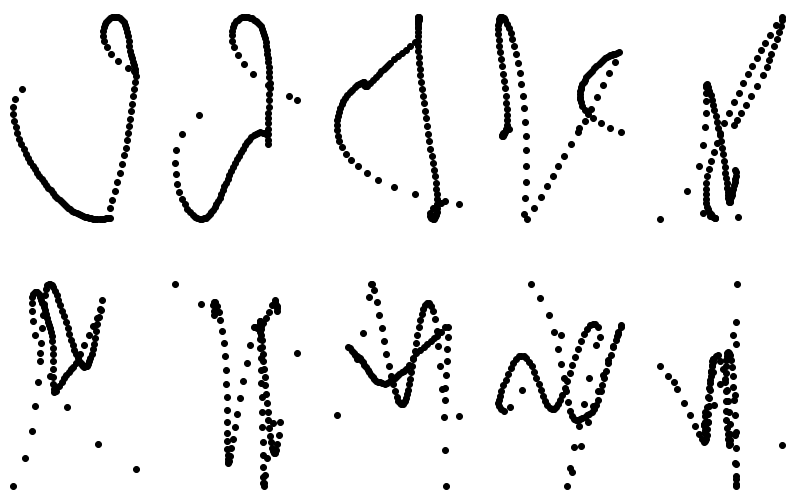

In [5]:
latent_dim = 10

# keep the latent_dim at 10, and put your solution below this line:
### BEGIN SOLUTION
from sklearn.decomposition import PCA

af_pca = PCA(n_components=latent_dim) #0.9)
af_pca_results = af_pca.fit(interpolated_data.reshape(29,202))
### END SOLUTION

fig, axes = plt.subplots((latent_dim-1 ) // 5 + 1, min(latent_dim,5),figsize=(14,9))
fig.patch.set_visible(False)


for i, ax in enumerate(axes.flat):
    ax.scatter(af_pca_results.components_[i].reshape(2,101)[0], 
               af_pca_results.components_[i].reshape(2,101)[1], 
               lw=1, color="black")
    ax.axis('off')

In [6]:

assert af_pca_results.n_components == latent_dim

The plots above are the components found by the PCA. The shapes don't mean anything, they are just the coordinates that will be combined to form new airfoil shapes. The original data can be expressed as linear combinations of these:

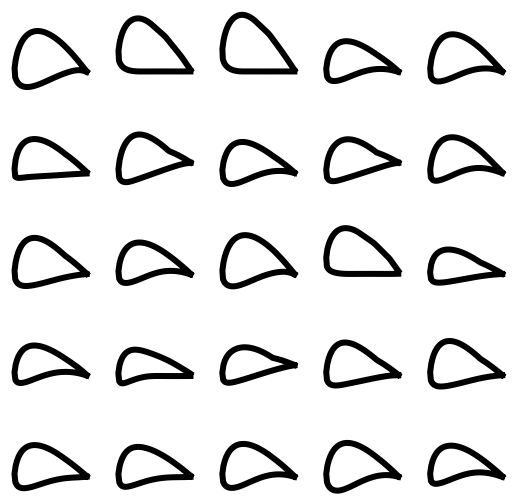

In [7]:
components = af_pca.transform(interpolated_data.reshape(29,202))
projected = af_pca.inverse_transform(components)

fig, axes = plt.subplots(5,5,figsize=(9,9))
fig.patch.set_visible(False)

offset=0

for i, ax in enumerate(axes.flat):
    ax.plot(projected[i+offset].reshape(2,101)[0], projected[i+offset].reshape(2,101)[1], lw=6, color="black")
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.03, 0.1])
    ax.axis('off')

The PCA should have yielded components which meaningfully convey certain properties of the airfoil designs above. Let's see if this is true:

In [8]:
def plot_generated(**kwargs):
    plt.figure(figsize=(7,7))
    
    input_vector = [weight for weight in kwargs.values()]
    
    generated = af_pca.inverse_transform(input_vector)
    
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.15, 0.2])
    
    fig.patch.set_visible(False)
    plt.axis('off')
    
    plt.plot(generated.reshape(2,101)[0], generated.reshape(2,101)[1], lw=6, color="black")
    
base_sample = 18
component_sliders = [widgets.FloatSlider(
        value=components[base_sample][i],
        min=min(components[:,i]),
        max=max(components[:,i]),
        step=(max(components[:,i] - min(components[:,i]))/10),
    ) for i in range(latent_dim)]

kwargs = {'c' + str(i):slider for i,slider in enumerate(component_sliders)}

interact(plot_generated, **kwargs)

interactive(children=(FloatSlider(value=-0.03333102210488651, description='c0', max=0.1918749578512881, min=-0…

<function __main__.plot_generated(**kwargs)>

You should see that the last sliders barely have an influence on the airfoil shape at all, since they represent the components with the lowest variance. The first sliders influence the result the most, since here, the variance is high. You should also see that the the variations induced by manipulating the sliders are meaningful relative to the "training" set.

PCA should also find representations of the data that makes it possible to understand the difference in samples in a much lower-dimensional setting. We can see that this works in the correlation plot of principal components 1 and 2. To do so, save all the $x$-coordinates of the principal components from the `components` array into a variable called `PC1`, and all the $y$-coordinates into a variable called `PC2` below:

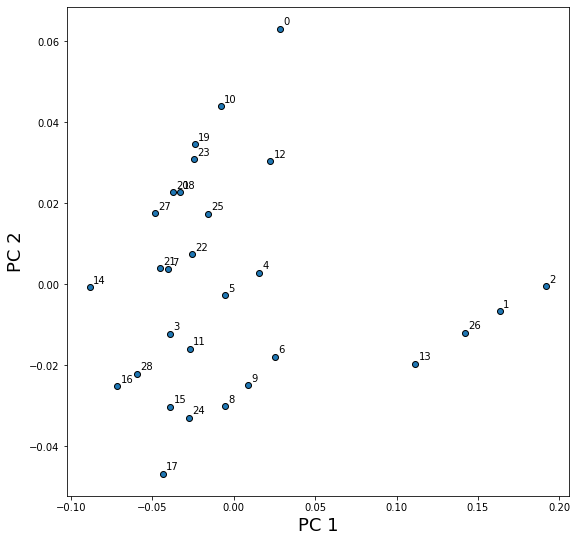

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(9,9))

### BEGIN SOLUTION
PC1 = components[:,0]
PC2 = components[:,1]
### END SOLUTION

plt.scatter(PC1, PC2, ec="black")
plt.xlabel(r"PC 1", fontsize=18)
plt.ylabel(r"PC 2", fontsize=18)

for i in range(components.shape[0]):
    plt.annotate(str(i), (components[i,0]+0.002, components[i,1]+0.001))


In [10]:

assert PC1.shape == (29,)
assert PC2.shape == (29,)

Here, the samples 1, 2, 13, and 26 seem to differ a lot from the rest of the samples regarding the first component. It's clear which property is captured by the first component when you look at the specific samples in the first graph of this exercise, by moving the slider to the respective number.

---

## $K$-Means (6 points)
We got to know a simple unsupervised clustering algorithm in the lecture called *$K$-Means*. We can apply it to the dataset above and see if it helps to identify different clusters.

First, find out how many clusters to expect by using the *elbow method*. Let's also create a *training* and a *test* set to see whether the results are sensible in the end:

In [11]:
components_test = components[:6]
components_train = components[6:]

Fill the gaps in the loop below:

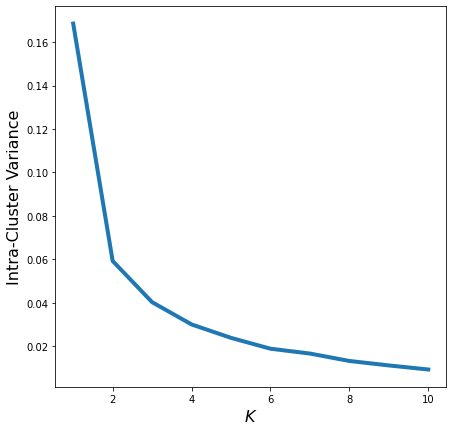

In [12]:
from sklearn.cluster import KMeans
intra_cluster_variance = []

for i in range(1, 11):
    # Instantiate a KMeans object with the number of clusters set to "i". You don't need to set anything else.
    # Then, fit the model to "components"
    # Thirdly, append the "intertia_" of the fit model to the "intra_cluster_variance" list
    ### BEGIN SOLUTION
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(components)
    intra_cluster_variance.append(kmeans.inertia_)
    ### END SOLUTION
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(7,7))

plt.plot(range(1, 11), intra_cluster_variance, lw=4)

plt.xlabel(r'$K$', fontsize=16)
plt.ylabel('Intra-Cluster Variance', fontsize=16)

plt.show()

You chould be able to choose a suitable $K$ from the graph above. Do so and implement a $K$-Means algorithm below, fitting to the `components_train` data and predicting for `components_test` for later comparison:

In [14]:
# Instantiate a KMeans object again, saved in a variable called "kmeans"
# Choose the number of cluster "n_clusters" appropriately
# Fit the model to "components_train"
# Then, create predictions for "components_test" and save them in a variable called "y_hat"
### BEGIN SOLUTION
kmeans = KMeans(n_clusters = 3)
kmeans.fit(components_train)
y_hat = kmeans.predict(components_test)
### END SOLUTION

We cannot plot 10D cluster centers, but we can plot their projections onto 2D:

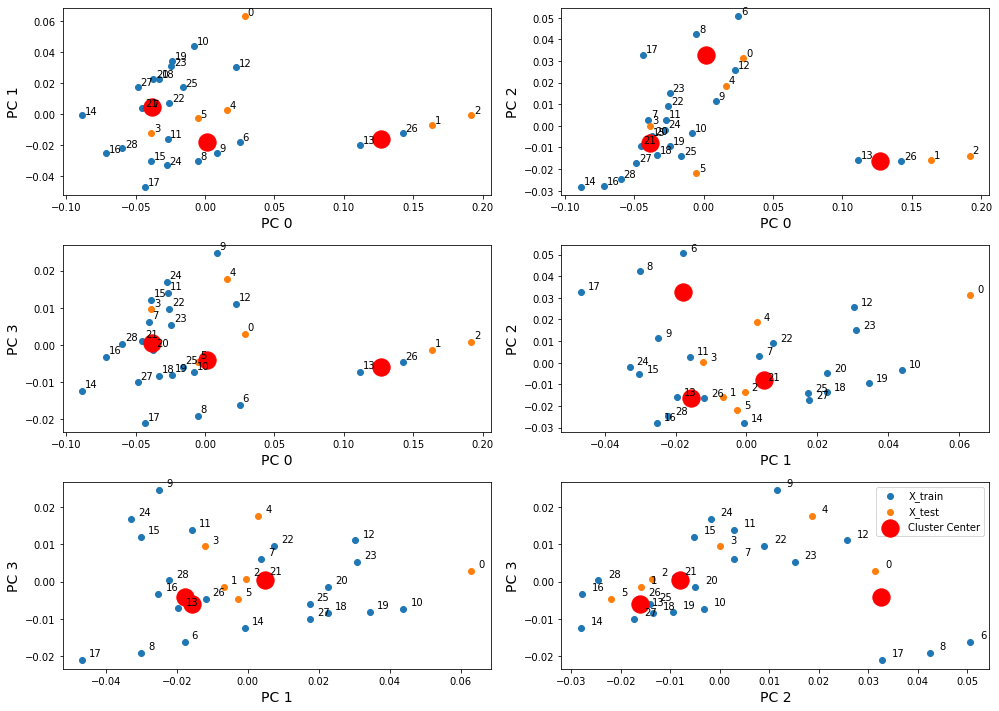

In [16]:
centers = kmeans.cluster_centers_

fig, axs = plt.subplots(3, 2, figsize=(14,10))
axs = axs.flatten()

for i in range(3):
    for j in range(i+1, 4):
        axs[i+j-1+(i+1)//2].scatter(components_train[:,i], components_train[:,j], label="X_train")
        axs[i+j-1+(i+1)//2].scatter(components_test[:,i], components_test[:,j], label="X_test")
        axs[i+j-1+(i+1)//2].scatter(centers[:,i], centers[:,j], s=300, c='red', label="Cluster Center")

        axs[i+j-1+(i+1)//2].set_xlabel(f"PC {i}", fontsize=14)
        axs[i+j-1+(i+1)//2].set_ylabel(f"PC {j}", fontsize=14)

        for k in range(components.shape[0]):
            axs[i+j-1+(i+1)//2].annotate(str(k), (components[k,i]+0.002, components[k,j]+0.001))

        
plt.legend()
plt.tight_layout()
plt.show()

These are just the first 6 correlation plots, you wouldn't see more in the rest. The first three show the clustering quite well.

---

## Identifying Substructures with t-SNE (10 Points)
We've seen how t-SNE was able to find unobvious clusters in datasets and present them in a more concise fashion, but only after tuning hyperparameters. Let's try it on the dataset from above to identify, e.g., the cluster consisting of the samples $[1, 2, 13, 26]$.

In the cell below, instantiate a `TSNE` object called `tsne` that you initialize with 2 components, 2500 iterations, verbosity of 1, and some perplexity of your choosing. Create a variable called `tsne_results` that contains the results of fitting t-SNE to the `components` from the exercises above.

The verbosity of 1 will give you information about what happens during the fitting process. Among other information, it will tell you how many *neighbors* are considered to be *nearest* for computing the similarity. Adjust the perplexity until a sensible number of neighbors is considered. Keep in mind that our goal here is to identify the $[1, 2, 13, 26]$-cluster.

A final KL-divergence of lower than 1 should be good. If your's is higher than that, execute the next cell until you get a result somewhere below 0.9.

In [31]:
from sklearn.manifold import TSNE

# create a variable called tsne that refers to the object created
# by calling TSNE, imported at the beginning of this cell
# use 2 components and an arbitray perplexity first. Iterations should be 2500.
# fit and transform the components from exercises above and save the results
# as "tsne_results". Then, adjust the perplexity to make t-SNE consider the
# most sensible number of nearest neighbors for this task.
### BEGIN SOLUTION
tsne = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=2500)
tsne_results = tsne.fit_transform(components)
### END SOLUTION

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 29 samples in 0.000s...
[t-SNE] Computed neighbors for 29 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 29 / 29
[t-SNE] Mean sigma: 0.009419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.743591
[t-SNE] KL divergence after 2450 iterations: 0.264819


In [23]:
assert tsne.n_components == 2
assert tsne.n_iter == 2500
assert tsne_results.shape == (29,2)
assert tsne.kl_divergence_ < 0.9


AssertionError: 

t-SNE produces components similar to `PCA`, but it does not learn a transformation directly that we can use to compare performance on a test set (although a parametric form of it will be implemented soon that does exactly that). We can plot the t-SNE components and mark the set of samples we tried to identify red:

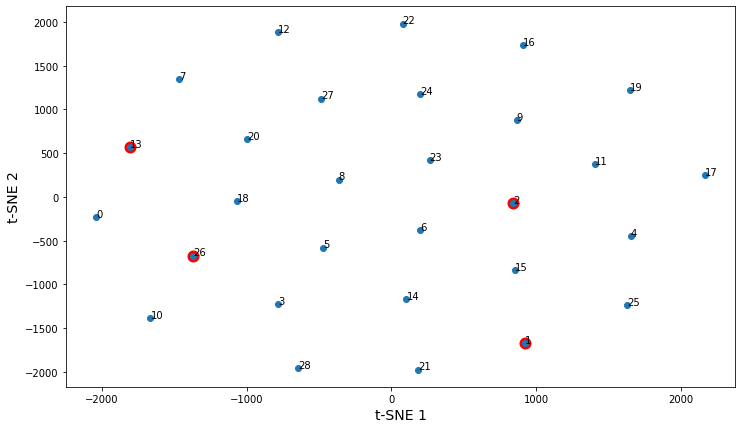

In [24]:
%matplotlib inline

plt.figure(figsize=(12,7))

plt.scatter(tsne_results[:,0], tsne_results[:,1])

plt.xlabel(f"t-SNE 1", fontsize=14)
plt.ylabel(f"t-SNE 2", fontsize=14)

for k in range(tsne_results.shape[0]):
    plt.annotate(str(k), (tsne_results[k,0]+0.002, tsne_results[k,1]+0.001))
    if k in [1, 2, 13, 26]:
        plt.scatter(tsne_results[k,0], tsne_results[k,1], color="red", lw=6, fc=None, ec="red", zorder=-1)

The samples we were interested in should be very obviously clustered, and you should see even more clusters of points. t-SNE found 7 substructures in our data, each telling us which NACA profiles are similar in their geometric shape.

Let's see what 3D t-SNE gives us. In the cell below, instantiate another `TSNE` object called `tsne_3D` this time, with the same parameters as above, but 3 components and 30000 iterations (curse of dimensionality...). Fit and transform the `components` and save the results in a variable called `tsne_3D_results`.

In [28]:
from sklearn.manifold import TSNE

### BEGIN SOLUTION
tsne_3D = TSNE(n_components=3, verbose=1, perplexity=1, n_iter=30000)
tsne_3D_results = tsne_3D.fit_transform(components)
### END SOLUTION

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 29 samples in 0.000s...
[t-SNE] Computed neighbors for 29 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 29 / 29
[t-SNE] Mean sigma: 0.003101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.478149
[t-SNE] KL divergence after 8450 iterations: 5.941229


In [26]:
assert tsne_3D.n_components == 3
assert tsne_3D.n_iter == 30000
assert tsne_3D_results.shape == (29,3)
assert tsne_3D.kl_divergence_ < 0.9


And plotting just the first, the first two, and all three components:

<IPython.core.display.Javascript object>


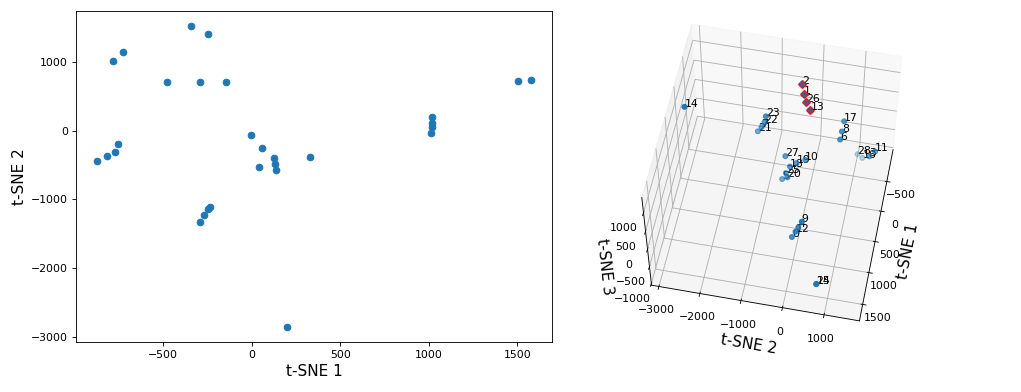

In [64]:
%matplotlib notebook

fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

axs = [ax1, ax2]

for i in range(2):
    axs[i].scatter(*[tsne_3D_results[:,j] for j in range(i+2)])
    axs[i].set_xlabel(f"t-SNE 1", fontsize=14)
    axs[i].set_ylabel(f"t-SNE 2", fontsize=14)
    
axs[1].set_zlabel(f"t-SNE 3", fontsize=14)

for k in range(tsne_3D_results.shape[0]):
    axs[1].text(tsne_3D_results[k,0]+0.002, 
                tsne_3D_results[k,1]+0.001, 
                tsne_3D_results[k,2]+0.001, 
                str(k))
    if k in [1, 2, 13, 26]:
        axs[1].scatter(tsne_3D_results[k,0], 
                       tsne_3D_results[k,1], 
                       tsne_3D_results[k,2], color="red", marker="x", lw=5)

plt.tight_layout()

You should see a number of clusters again. The 2D graph doesn't make much sense, since t-SNE optimizes the positions in 3D space, and the first 2 components may not contain any meaning at all in contrast to a PCA.

We can use the elbow method again to find out how many there are:

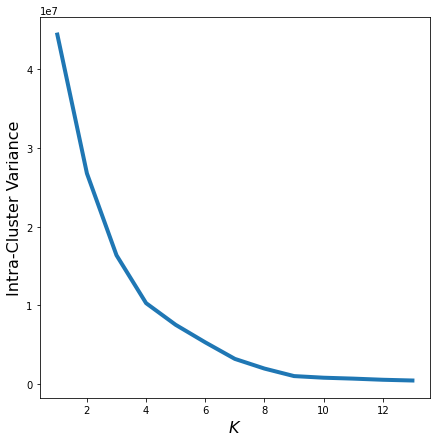

In [62]:
from sklearn.cluster import KMeans

tsne_3D_intra_cluster_variance = []

for i in range(1, 14):
    # Instantiate a KMeans object with clusters set to "i". You don't need to set anything else.
    # Then, fit the model to "tsne_3D_results"
    # Thirdly, append the "intertia_" of the fit model to the "tsne_3D_intra_cluster_variance" list
    ### BEGIN SOLUTION
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(tsne_3D_results)
    tsne_3D_intra_cluster_variance.append(kmeans.inertia_)
    ### END SOLUTION
    
#Plotting the results as a curve, allowing us to observe 'the elbow'
plt.figure(figsize=(7,7))

plt.plot(range(1, 14), tsne_3D_intra_cluster_variance, lw=4)

plt.xlabel(r'$K$', fontsize=16)
plt.ylabel('Intra-Cluster Variance', fontsize=16)

plt.show()

In tests, the correct number of clusters was usually quite obvious from the graph above. This is often the case for a well-tuned t-SNE analysis. It may be different depending on your t-SNE run, but should be between 7 and 10.

In the cell below, fit `KMeans` with the appropriate number of clusters to the `tsne_3D_results`, just like you did before. Use the variable `kmeans_tsne`.

In [45]:
# Instantiate a KMeans object again, saved in a variable called "kmeans_tsne"
# Choose the number of clusters "n_clusters" according to the elbow graph above
# Fit the model to the "tsne_3D_results"
### BEGIN SOLUTION
kmeans_tsne = KMeans(n_clusters=9)
kmeans_tsne.fit(tsne_3D_results)
### END SOLUTION

KMeans(n_clusters=9)

And plotting the clusters into the 3D t-SNE plot:

<IPython.core.display.Javascript object>


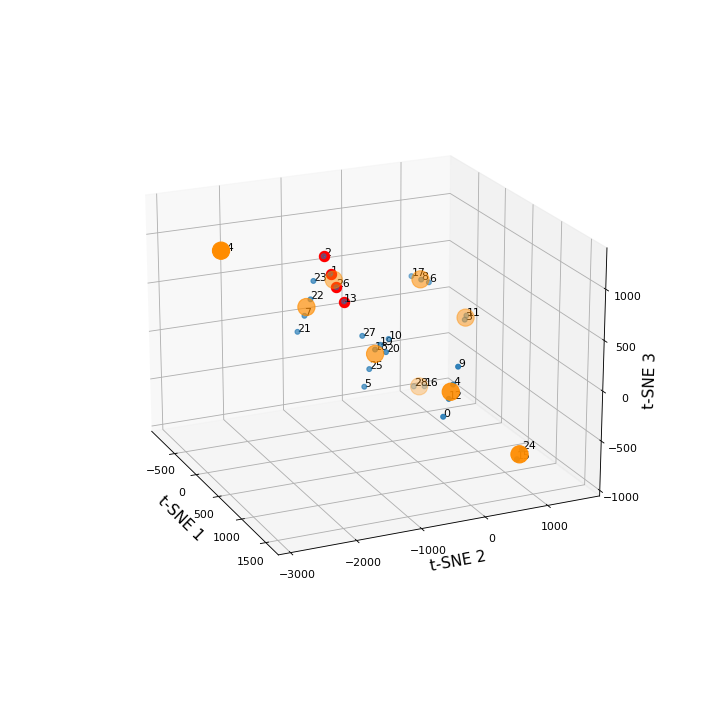

Text(0.5, 0, 't-SNE 3')

In [47]:
tsne_3D_centers = kmeans_tsne.cluster_centers_

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*[tsne_3D_results[:,j] for j in range(3)])
ax.scatter(tsne_3D_centers[:,0], 
           tsne_3D_centers[:,1], 
           tsne_3D_centers[:,2], s=250, c='darkorange', label="Cluster Center")

for k in range(tsne_3D_results.shape[0]):
    ax.text(tsne_3D_results[k,0],
            tsne_3D_results[k,1],
            tsne_3D_results[k,2],
            str(k))
    if k in [1, 2, 13, 26]:
        ax.scatter(tsne_3D_results[k,0], 
                   tsne_3D_results[k,1], 
                   tsne_3D_results[k,2], lw=6, fc=None, ec="red")

        
ax.set_xlabel("t-SNE 1", fontsize=14)
ax.set_ylabel("t-SNE 2", fontsize=14)
ax.set_zlabel("t-SNE 3", fontsize=14)

Graphs like these help with identifying hidden inner structures in data. In this case, when you check out and compare the samples in the clusters above e.g. in the interactive plot in the first part of this assignment, you'll see that they share common traits. When there is a lot of simulation (or experimental) data, it can help to identify different modes in the results. For example, different bending and torsion modes in dynamical simulations, or different buckling cases in crash simulations. Or different microstructures in material experiments. 

---